In [1]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install nltk
%pip install Sastrawi
%pip install wordcloud
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



# Data PreProcessing

In [2]:
import pandas as pd

df = pd.read_csv('sample_data/the_data_selected.csv', sep=';', encoding='ISO-8859-1')
# df = pd.read_csv('sample_data/the_data_selected.csv', sep=',')
my_df = df[['score', 'content']]
my_df.head()

,score,content
0,5,NaN
1,5,NaN
2,5,Bagus
3,5,NaN
4,4,"Tempat edukasi bagus, tempat terawat walau mas..."


### Menghitung Jumlah Baris

In [3]:
len(my_df.index)

2400

### Menghapus Baris yang Null

In [4]:
my_df = my_df.dropna(subset=['content'])
my_df.isnull().sum()

score      0
content    0
dtype: int64

### Menghitung Jumlah Baris setelah Null Dihilangkan

In [5]:
len(my_df)

1365

## a. Casefolding

Proses casefolding adalah proses mengubah seluruh huruf menjadi kecil.

In [6]:
import re
def clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    my_df[new_text_field_name] = my_df[new_text_field_name].str.replace(r"\d+", "")
    return my_df

In [7]:
my_df['text_clean'] = my_df['content'].str.lower()

In [8]:
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head()

,score,content,text_clean
2,5,Bagus,bagus
4,4,"Tempat edukasi bagus, tempat terawat walau mas...",tempat edukasi bagus tempat terawat walau masi...
9,5,Atraksi lumba2nya sudah update. Sudah kesini 3...,atraksi lumba2nya sudah update sudah kesini 3 ...
10,1,Coba aja pasti menyesal,coba aja pasti menyesal
11,5,Cocok untuk berlibur bersama keluarga\nPentas ...,cocok untuk berlibur bersama keluargapentas lu...


## b. Filtering

Filtering Stopword adalah kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna. Stopword biasanya dihilangkan dalam proses pengolahan teks. contoh dalam bahasa Indonesia seperti "dan", "atau", "yang", "di", "dari", "ke", "dengan", "jika", "ketika", "saat", "atau", "tetapi", "karena", "sehingga", "sebelum", "setelah", "agar", "supaya", "serta", "itulah", "yaitu", "misalnya", "contoh", "adalah", "yakni", "dst". Stopword mempunya informasi rencahan yang kecil, sehingga tidak berpengaruh dalam proses klasifikasi.

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('indonesian')
data_clean['text_Stopword'] = data_clean['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,score,content,text_clean,text_Stopword
2,5,Bagus,bagus,bagus
4,4,"Tempat edukasi bagus, tempat terawat walau mas...",tempat edukasi bagus tempat terawat walau masi...,edukasi bagus terawat tahap pengembangan jalan...
9,5,Atraksi lumba2nya sudah update. Sudah kesini 3...,atraksi lumba2nya sudah update sudah kesini 3 ...,atraksi lumba2nya update kesini 3 kali alhamdu...
10,1,Coba aja pasti menyesal,coba aja pasti menyesal,coba aja menyesal
11,5,Cocok untuk berlibur bersama keluarga\nPentas ...,cocok untuk berlibur bersama keluargapentas lu...,cocok berlibur keluargapentas lumba lumbanaik ...


## c. Tokenizing

Tokenizing merupakan proses pemisahan text menjadi potongan-potongan yang lebih kecil. Tokenizing dapat dilakukan dengan menggunakan library NLTK.

In [10]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.tokenize import word_tokenize, sent_tokenize
data_clean['text_tokens'] = data_clean['text_Stopword'].apply(lambda x: word_tokenize(x))
data_clean.head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\anfiniti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,score,content,text_clean,text_Stopword,text_tokens
2,5,Bagus,bagus,bagus,[bagus]
4,4,"Tempat edukasi bagus, tempat terawat walau mas...",tempat edukasi bagus tempat terawat walau masi...,edukasi bagus terawat tahap pengembangan jalan...,"[edukasi, bagus, terawat, tahap, pengembangan,..."
9,5,Atraksi lumba2nya sudah update. Sudah kesini 3...,atraksi lumba2nya sudah update sudah kesini 3 ...,atraksi lumba2nya update kesini 3 kali alhamdu...,"[atraksi, lumba2nya, update, kesini, 3, kali, ..."
10,1,Coba aja pasti menyesal,coba aja pasti menyesal,coba aja menyesal,"[coba, aja, menyesal]"
11,5,Cocok untuk berlibur bersama keluarga\nPentas ...,cocok untuk berlibur bersama keluargapentas lu...,cocok berlibur keluargapentas lumba lumbanaik ...,"[cocok, berlibur, keluargapentas, lumba, lumba..."


## d. Stemming

Stemming adalah proses pemetaan dan penguraian bentuk dari kata ke bentuk dasarnya. Stemming dilakukan dengan menghilangkan imbuhan-imbuhan yang terdapat pada kata. Contoh stemming adalah mengubah kata "membaca" menjadi "baca".

In [11]:
%pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [12]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [13]:
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung = 0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung += 1
    print(hitung, ":", term, ":", term_dict[term])

print(term_dict)
print("------------------------")

# Apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data_clean['text_tokens_stemmed'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)


3401
------------------------
1 : bagus : bagus
2 : edukasi : edukasi
3 : terawat : awat
4 : tahap : tahap
5 : pengembangan : kembang
6 : jalan : jalan
7 : area : area
8 : pertunjukan : tunjuk
9 : satwa : satwa
10 : pintu : pintu
11 : masuk : masuk
12 : teramat : amat
13 : tifak : tifak
14 : stroller : stroller
15 : friendly : friendly
16 : yg : yg
17 : pejalan : pejal
18 : kaki : kaki
19 : apalgi : apalgi
20 : bawa : bawa
21 : anak : anak
22 : lbh : lbh
23 : 1tapi : 1tapi
24 : hewan : hewan
25 : nya : nya
26 : atraksi : atraksi
27 : lumba2nya : lumba2nya
28 : update : update
29 : kesini : kesini
30 : 3 : 3
31 : kali : kali
32 : alhamdulillah : alhamdulillah
33 : puas : puas
34 : pantainya : pantai
35 : bersih : bersih
36 : enak : enak
37 : mainan : main
38 : anak2 : anak2
39 : coba : coba
40 : aja : aja
41 : menyesal : sesal
42 : cocok : cocok
43 : berlibur : libur
44 : keluargapentas : keluargapentas
45 : lumba : lumba
46 : lumbanaik : lumbanaik
47 : gajah : gajah
48 : menarik : tari

,score,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed
2,5,Bagus,bagus,bagus,[bagus],bagus
4,4,"Tempat edukasi bagus, tempat terawat walau mas...",tempat edukasi bagus tempat terawat walau masi...,edukasi bagus terawat tahap pengembangan jalan...,"[edukasi, bagus, terawat, tahap, pengembangan,...",edukasi bagus awat tahap kembang jalan area tu...
9,5,Atraksi lumba2nya sudah update. Sudah kesini 3...,atraksi lumba2nya sudah update sudah kesini 3 ...,atraksi lumba2nya update kesini 3 kali alhamdu...,"[atraksi, lumba2nya, update, kesini, 3, kali, ...",atraksi lumba2nya update kesini 3 kali alhamdu...
10,1,Coba aja pasti menyesal,coba aja pasti menyesal,coba aja menyesal,"[coba, aja, menyesal]",coba aja sesal
11,5,Cocok untuk berlibur bersama keluarga\nPentas ...,cocok untuk berlibur bersama keluargapentas lu...,cocok berlibur keluargapentas lumba lumbanaik ...,"[cocok, berlibur, keluargapentas, lumba, lumba...",cocok libur keluargapentas lumba lumbanaik gajah
13,5,Pertunjukan satwa dan lumba lumba menarik,pertunjukan satwa dan lumba lumba menarik,pertunjukan satwa lumba lumba menarik,"[pertunjukan, satwa, lumba, lumba, menarik]",tunjuk satwa lumba lumba tarik
15,5,tujuan yang bagus,tujuan yang bagus,tujuan bagus,"[tujuan, bagus]",tuju bagus
16,3,"Tempat Untuk edukasi anak sudah cukup baik,sa...",tempat untuk edukasi anak sudah cukup baiksara...,edukasi anak baiksaran pengunjung fasilitas ke...,"[edukasi, anak, baiksaran, pengunjung, fasilit...",edukasi anak baiksaran unjung fasilitas layak ...
19,5,"tempat wisata yang sangat bagus , sangat cocok...",tempat wisata yang sangat bagus sangat cocok ...,wisata bagus cocok piknik keluarga,"[wisata, bagus, cocok, piknik, keluarga]",wisata bagus cocok piknik keluarga
20,5,SERU BGT,seru bgt,seru bgt,"[seru, bgt]",seru bgt


In [14]:
data_clean.to_csv('sample_data/the_data_hasiltextpreprocessing.csv', index=False)

# Data Labelling

In [15]:
def pelabelan(skor):
    if skor < 3:
        return 'negatif'
    elif skor == 4:
        return 'positif'
    elif skor == 5:
        return 'positif'
my_df['Label'] = my_df['score'].apply(pelabelan)
my_df = my_df.dropna()

my_df.to_csv('sample_data/the_data_hasillabeling.csv', index=False)

my_df.head()

,score,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label
2,5,Bagus,bagus,bagus,[bagus],bagus,positif
4,4,"Tempat edukasi bagus, tempat terawat walau mas...",tempat edukasi bagus tempat terawat walau masi...,edukasi bagus terawat tahap pengembangan jalan...,"[edukasi, bagus, terawat, tahap, pengembangan,...",edukasi bagus awat tahap kembang jalan area tu...,positif
9,5,Atraksi lumba2nya sudah update. Sudah kesini 3...,atraksi lumba2nya sudah update sudah kesini 3 ...,atraksi lumba2nya update kesini 3 kali alhamdu...,"[atraksi, lumba2nya, update, kesini, 3, kali, ...",atraksi lumba2nya update kesini 3 kali alhamdu...,positif
10,1,Coba aja pasti menyesal,coba aja pasti menyesal,coba aja menyesal,"[coba, aja, menyesal]",coba aja sesal,negatif
11,5,Cocok untuk berlibur bersama keluarga\nPentas ...,cocok untuk berlibur bersama keluargapentas lu...,cocok berlibur keluargapentas lumba lumbanaik ...,"[cocok, berlibur, keluargapentas, lumba, lumba...",cocok libur keluargapentas lumba lumbanaik gajah,positif


### Menampilkan isi Data Hasil Labelling

In [16]:
import pandas as pd
hasillabeling = pd.read_csv('sample_data/the_data_hasillabeling.csv')
pd.set_option('display.max_colwidth', None)
hasillabeling[['content', 'text_clean', 'text_Stopword', 'text_tokens', 'text_tokens_stemmed', 'Label']].head(6)

,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label
0,Bagus,bagus,bagus,['bagus'],bagus,positif
1,"Tempat edukasi bagus, tempat terawat walau masih dalam tahap pengembangan.. Tapi jalan ke area pertunjukan satwa dari pintu masuk teramat jauh, tifak stroller friendly, bahkan bukan jalan yg bagus untuk pejalan kaki apalgi jika bawa anak lbh dari 1.tapi pertunjukan hewan nya bagus, hewan terawat",tempat edukasi bagus tempat terawat walau masih dalam tahap pengembangan tapi jalan ke area pertunjukan satwa dari pintu masuk teramat jauh tifak stroller friendly bahkan bukan jalan yg bagus untuk pejalan kaki apalgi jika bawa anak lbh dari 1tapi pertunjukan hewan nya bagus hewan terawat,edukasi bagus terawat tahap pengembangan jalan area pertunjukan satwa pintu masuk teramat tifak stroller friendly jalan yg bagus pejalan kaki apalgi bawa anak lbh 1tapi pertunjukan hewan nya bagus hewan terawat,"['edukasi', 'bagus', 'terawat', 'tahap', 'pengembangan', 'jalan', 'area', 'pertunjukan', 'satwa', 'pintu', 'masuk', 'teramat', 'tifak', 'stroller', 'friendly', 'jalan', 'yg', 'bagus', 'pejalan', 'kaki', 'apalgi', 'bawa', 'anak', 'lbh', '1tapi', 'pertunjukan', 'hewan', 'nya', 'bagus', 'hewan', 'terawat']",edukasi bagus awat tahap kembang jalan area tunjuk satwa pintu masuk amat tifak stroller friendly jalan yg bagus pejal kaki apalgi bawa anak lbh 1tapi tunjuk hewan nya bagus hewan awat,positif
2,"Atraksi lumba2nya sudah update. Sudah kesini 3 kali alhamdulillah selalu puas dengan atraksi lumba2nya. Pantainya bersih, enak buat mainan anak2",atraksi lumba2nya sudah update sudah kesini 3 kali alhamdulillah selalu puas dengan atraksi lumba2nya pantainya bersih enak buat mainan anak2,atraksi lumba2nya update kesini 3 kali alhamdulillah puas atraksi lumba2nya pantainya bersih enak mainan anak2,"['atraksi', 'lumba2nya', 'update', 'kesini', '3', 'kali', 'alhamdulillah', 'puas', 'atraksi', 'lumba2nya', 'pantainya', 'bersih', 'enak', 'mainan', 'anak2']",atraksi lumba2nya update kesini 3 kali alhamdulillah puas atraksi lumba2nya pantai bersih enak main anak2,positif
3,Coba aja pasti menyesal,coba aja pasti menyesal,coba aja menyesal,"['coba', 'aja', 'menyesal']",coba aja sesal,negatif
4,Cocok untuk berlibur bersama keluarga\nPentas LUMBA - LUMBA\nNaik GAJAH,cocok untuk berlibur bersama keluargapentas lumba lumbanaik gajah,cocok berlibur keluargapentas lumba lumbanaik gajah,"['cocok', 'berlibur', 'keluargapentas', 'lumba', 'lumbanaik', 'gajah']",cocok libur keluargapentas lumba lumbanaik gajah,positif
5,Pertunjukan satwa dan lumba lumba menarik,pertunjukan satwa dan lumba lumba menarik,pertunjukan satwa lumba lumba menarik,"['pertunjukan', 'satwa', 'lumba', 'lumba', 'menarik']",tunjuk satwa lumba lumba tarik,positif


### Jumlah Label Aktual

In [17]:
len(hasillabeling)

1276

### Jumlah Label Mentah Positif dan Presentase

In [18]:
positive_count = hasillabeling[hasillabeling['Label'] == 'positif'].shape[0]
print(positive_count)

1183


In [19]:
total_count = len(hasillabeling)
positive_percentage = (positive_count / total_count) * 100
print(f"Percentage of positive reviews: {positive_percentage:.2f}%")

Percentage of positive reviews: 92.71%


### Jumlah Label Mentah Negatif dan Presentase

In [20]:
negative_count = hasillabeling[hasillabeling['Label'] == 'negatif'].shape[0]
print(negative_count)

93


In [21]:
negative_count = hasillabeling[hasillabeling['Label'] == 'negatif'].shape[0]
negative_percentage = (negative_count / total_count) * 100
print(f"Percentage of negative reviews: {negative_percentage:.2f}%")

Percentage of negative reviews: 7.29%


# Data Extracting

In [22]:
import pandas as pd

data_clean = pd.read_csv('sample_data/the_data_hasillabeling.csv')
data_clean = pd.DataFrame(data_clean)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']

### Drop Kolom yang Tidak Digunakan

In [23]:
data_clean = data_clean.drop(columns=['score', 'text_clean', 'text_Stopword', 'text_tokens'])

### Setup TFIDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string

A = A.fillna('')

tfid_vectorizer = TfidfVectorizer()

A_fit_tfid = tfid_vectorizer.fit_transform(A)
A_tfid = tfid_vectorizer.transform(A)

### Menampilkan Jumlah Data Hasil Extracting

In [25]:
print(A.shape)
print(A_tfid.shape)

(1276,)
(1276, 2724)


### Konversi Data Hasil Extracting ke Array

In [26]:
A_tfid.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Penerapan Algoritma

## a. Naive Bayes

### 1. Cara Konvensional

In [27]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(A_tfid, B)

MultinomialNB()

In [28]:
B_pred = nb.predict(A_tfid)
data_clean['Label NB'] = B_pred
data_clean = pd.DataFrame(data_clean)
data_clean.to_csv('sample_data/the_data_hasil_sentimen_NB.csv', index=False)

data_clean.head()

,content,text_tokens_stemmed,Label,Label NB
0,Bagus,bagus,positif,positif
1,"Tempat edukasi bagus, tempat terawat walau masih dalam tahap pengembangan.. Tapi jalan ke area pertunjukan satwa dari pintu masuk teramat jauh, tifak stroller friendly, bahkan bukan jalan yg bagus untuk pejalan kaki apalgi jika bawa anak lbh dari 1.tapi pertunjukan hewan nya bagus, hewan terawat",edukasi bagus awat tahap kembang jalan area tunjuk satwa pintu masuk amat tifak stroller friendly jalan yg bagus pejal kaki apalgi bawa anak lbh 1tapi tunjuk hewan nya bagus hewan awat,positif,positif
2,"Atraksi lumba2nya sudah update. Sudah kesini 3 kali alhamdulillah selalu puas dengan atraksi lumba2nya. Pantainya bersih, enak buat mainan anak2",atraksi lumba2nya update kesini 3 kali alhamdulillah puas atraksi lumba2nya pantai bersih enak main anak2,positif,positif
3,Coba aja pasti menyesal,coba aja sesal,negatif,positif
4,Cocok untuk berlibur bersama keluarga\nPentas LUMBA - LUMBA\nNaik GAJAH,cocok libur keluargapentas lumba lumbanaik gajah,positif,positif


### 2. Cara Pakai 5K-Fold Cross Validation

In [29]:

from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Inisialisasi model MultinomialNB
model = MultinomialNB()

# Setup K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan akurasi dan prediksi dari setiap fold
fold_accuracies = []
all_predictions = np.zeros_like(B)  # Array untuk menyimpan prediksi dari setiap fold

# Iterasi manual pada setiap fold
for train_index, test_index in kf.split(A_tfid):
    # Bagi data menjadi train dan test berdasarkan fold
    A_train, A_test = A_tfid[train_index], A_tfid[test_index]
    B_train, B_test = B[train_index], B[test_index]

    # Latih model pada data train
    model.fit(A_train, B_train)

    # Prediksi data test
    B_pred = model.predict(A_test)

    # Hitung akurasi untuk fold ini
    accuracy = accuracy_score(B_test, B_pred)
    fold_accuracies.append(accuracy)

    # Simpan prediksi untuk fold ini ke dalam array prediksi keseluruhan
    all_predictions[test_index] = B_pred

# Cetak akurasi per fold
print("Fold Accuracies:", fold_accuracies)
print("Mean Accuracy:", np.mean(fold_accuracies))
print("Standard Deviation of Accuracy:", np.std(fold_accuracies))

# Hitung akurasi total menggunakan rata-rata prediksi
overall_accuracy = accuracy_score(B, all_predictions)
print("Overall Accuracy with Average Predictions:", overall_accuracy)

# Gabungkan hasil rata-rata prediksi dengan dataframe asli
data_clean['Label NB Average'] = all_predictions

# Simpan hasil ke file CSV
data_clean.to_csv('sample_data/the_data_NB_average.csv', index=False)


Fold Accuracies: [0.92578125, 0.9372549019607843, 0.9254901960784314, 0.9137254901960784, 0.9333333333333333]
Mean Accuracy: 0.9271170343137255
Standard Deviation of Accuracy: 0.008064528630514715
Overall Accuracy with Average Predictions: 0.927115987460815


## b. Support Vector Machine (SVM)

### 1. Cara Konvensional

In [30]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(A_tfid, B)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(B, svm.predict(A_tfid))))

svm = LinearSVC(C = 1)
svm.fit(A_tfid, B)

Accuracy for C=0.01: 0.927115987460815
Accuracy for C=0.05: 0.927115987460815
Accuracy for C=0.25: 0.9420062695924765
Accuracy for C=0.5: 0.9843260188087775
Accuracy for C=0.75: 0.9913793103448276
Accuracy for C=1: 0.9952978056426333


LinearSVC(C=1)

In [31]:
B_pred = svm.predict(A_tfid)
data_clean['Label SVM'] = B_pred
data_clean.to_csv('sample_data/the_data_hasil_sentimen_SVM.csv', index=False)
data_clean.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM
0,Bagus,bagus,positif,positif,positif,positif
1,"Tempat edukasi bagus, tempat terawat walau masih dalam tahap pengembangan.. Tapi jalan ke area pertunjukan satwa dari pintu masuk teramat jauh, tifak stroller friendly, bahkan bukan jalan yg bagus untuk pejalan kaki apalgi jika bawa anak lbh dari 1.tapi pertunjukan hewan nya bagus, hewan terawat",edukasi bagus awat tahap kembang jalan area tunjuk satwa pintu masuk amat tifak stroller friendly jalan yg bagus pejal kaki apalgi bawa anak lbh 1tapi tunjuk hewan nya bagus hewan awat,positif,positif,positif,positif
2,"Atraksi lumba2nya sudah update. Sudah kesini 3 kali alhamdulillah selalu puas dengan atraksi lumba2nya. Pantainya bersih, enak buat mainan anak2",atraksi lumba2nya update kesini 3 kali alhamdulillah puas atraksi lumba2nya pantai bersih enak main anak2,positif,positif,positif,positif
3,Coba aja pasti menyesal,coba aja sesal,negatif,positif,positif,negatif
4,Cocok untuk berlibur bersama keluarga\nPentas LUMBA - LUMBA\nNaik GAJAH,cocok libur keluargapentas lumba lumbanaik gajah,positif,positif,positif,positif


### 2. Cara Pakai 5K-Fold Cross Validation

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Inisialisasi model Support Vector Machine (SVM)
model = SVC(kernel='linear', random_state=42, C = 1.0)

# Setup K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List untuk menyimpan akurasi dan prediksi dari setiap fold
fold_accuracies = []
all_predictions = np.zeros_like(B)  # Array untuk menyimpan prediksi dari setiap fold

# Iterasi manual pada setiap fold
for train_index, test_index in kf.split(A_tfid):
    # Bagi data menjadi train dan test berdasarkan fold
    A_train, A_test = A_tfid[train_index], A_tfid[test_index]
    B_train, B_test = B[train_index], B[test_index]

    # Latih model pada data train
    model.fit(A_train, B_train)

    # Prediksi data test
    B_pred = model.predict(A_test)

    # Hitung akurasi untuk fold ini
    accuracy = accuracy_score(B_test, B_pred)
    fold_accuracies.append(accuracy)

    # Simpan prediksi untuk fold ini ke dalam array prediksi keseluruhan
    all_predictions[test_index] = B_pred

# Cetak akurasi per fold
print("Fold Accuracies:", fold_accuracies)
print("Mean Accuracy:", np.mean(fold_accuracies))
print("Standard Deviation of Accuracy:", np.std(fold_accuracies))

# Hitung akurasi total menggunakan rata-rata prediksi
overall_accuracy = accuracy_score(B, all_predictions)
print("Overall Accuracy with Average Predictions:", overall_accuracy)

# Gabungkan hasil rata-rata prediksi dengan dataframe asli
data_clean['Label SVM Average'] = all_predictions

# Simpan hasil ke file CSV
data_clean.to_csv('sample_data/the_data_SVM_average.csv', index=False)


Fold Accuracies: [0.9296875, 0.9372549019607843, 0.9254901960784314, 0.9176470588235294, 0.9372549019607843]
Mean Accuracy: 0.9294669117647059
Standard Deviation of Accuracy: 0.007441470727732229
Overall Accuracy with Average Predictions: 0.9294670846394985


In [33]:
data_clean.to_csv('sample_data/the_data_hasil_NB_dan_SVM.csv', index=False)

# Evaluasi Model

In [34]:
import pandas as pd

data_clean = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
data_clean = pd.DataFrame(data_clean)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']

### Menampilkan 5 baris data_clean

In [35]:
data_clean.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,Bagus,bagus,positif,positif,positif,positif,positif
1,"Tempat edukasi bagus, tempat terawat walau masih dalam tahap pengembangan.. Tapi jalan ke area pertunjukan satwa dari pintu masuk teramat jauh, tifak stroller friendly, bahkan bukan jalan yg bagus untuk pejalan kaki apalgi jika bawa anak lbh dari 1.tapi pertunjukan hewan nya bagus, hewan terawat",edukasi bagus awat tahap kembang jalan area tunjuk satwa pintu masuk amat tifak stroller friendly jalan yg bagus pejal kaki apalgi bawa anak lbh 1tapi tunjuk hewan nya bagus hewan awat,positif,positif,positif,positif,positif
2,"Atraksi lumba2nya sudah update. Sudah kesini 3 kali alhamdulillah selalu puas dengan atraksi lumba2nya. Pantainya bersih, enak buat mainan anak2",atraksi lumba2nya update kesini 3 kali alhamdulillah puas atraksi lumba2nya pantai bersih enak main anak2,positif,positif,positif,positif,positif
3,Coba aja pasti menyesal,coba aja sesal,negatif,positif,positif,negatif,positif
4,Cocok untuk berlibur bersama keluarga\nPentas LUMBA - LUMBA\nNaik GAJAH,cocok libur keluargapentas lumba lumbanaik gajah,positif,positif,positif,positif,positif


### Menghitung Jumlah Baris data_clean

In [36]:
len(data_clean)

1276

### Setup TFIDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string

A = A.fillna('')

tfid_vectorizer = TfidfVectorizer()

A_fit_tfid = tfid_vectorizer.fit_transform(A)
A_tfid = tfid_vectorizer.transform(A)

## a1. k-fold Cross Validation NB

In [38]:
# a1. k-fold Cross Validation NB
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy')
print(f"Akurasi setiap fold: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy')}")
print(f"Rata-rata akurasi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Standar deviasi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').std()}")
print(f"Akurasi tertinggi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').max()}")
print(f"Akurasi terendah: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').min()}")
print(f"Waktu eksekusi: {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")


Akurasi setiap fold: [0.92578125 0.92941176 0.92941176 0.9254902  0.9254902 ]
Rata-rata akurasi: 0.9271170343137255
Standar deviasi: 0.0018766512817144053
Akurasi tertinggi: 0.9294117647058824
Akurasi terendah: 0.9254901960784314
Waktu eksekusi: 0.9271170343137255


## a2. k-fold Cross Validation SVM

In [39]:
# a2. k-fold Cross Validation SVM
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
    svm = LinearSVC(C=c)
    svm.fit(A_tfid, B)
    print ("Accuracy for C=%s: %s" % (c, accuracy_score(B, svm.predict(A_tfid))))

svm = LinearSVC(C = 1)
svm.fit(A_tfid, B)

cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy')
print(f"Akurasi setiap fold: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy')}")
print(f"Rata-rata akurasi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Standar deviasi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').std()}")
print(f"Akurasi tertinggi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').max()}")
print(f"Akurasi terendah: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').min()}")
print(f"Waktu eksekusi: {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")

Accuracy for C=0.01: 0.927115987460815
Accuracy for C=0.05: 0.927115987460815
Accuracy for C=0.25: 0.9420062695924765
Accuracy for C=0.5: 0.9843260188087775
Accuracy for C=0.75: 0.9913793103448276
Accuracy for C=1: 0.9952978056426333
Akurasi setiap fold: [0.9296875  0.94117647 0.9372549  0.9254902  0.9254902 ]
Rata-rata akurasi: 0.9318198529411765
Standar deviasi: 0.006352355353799528
Akurasi tertinggi: 0.9411764705882353
Akurasi terendah: 0.9254901960784314
Waktu eksekusi: 0.9318198529411765


## b1. Metriks NB

In [40]:
# b1. Metriks NB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label NB']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label NB"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label NB']))

Accuracy score: 0.927115987460815
Precision score: 0.8595440542054422
Recall score: 0.927115987460815
F1 score: 0.8920522270566442
confusion matrix:
[[   0   93]
 [   0 1183]]

              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        93
     positif       0.93      1.00      0.96      1183

    accuracy                           0.93      1276
   macro avg       0.46      0.50      0.48      1276
weighted avg       0.86      0.93      0.89      1276



c:\Users\anfiniti\Codes\anfipy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anfiniti\Codes\anfipy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anfiniti\Codes\anfipy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\U

## b2. Metriks SVM

In [41]:
# b2. Metriks SVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label SVM']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label SVM"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label SVM']))

Accuracy score: 0.9952978056426333
Precision score: 0.995321534125513
Recall score: 0.9952978056426333
F1 score: 0.9952253828627616
confusion matrix:
[[  87    6]
 [   0 1183]]

              precision    recall  f1-score   support

     negatif       1.00      0.94      0.97        93
     positif       0.99      1.00      1.00      1183

    accuracy                           1.00      1276
   macro avg       1.00      0.97      0.98      1276
weighted avg       1.00      1.00      1.00      1276



# Analisis dan Perbandingan Hasil

## a. Perbandingan Akurasi

In [42]:
print(f"Rata-rata akurasi NB (K-Fold Cross Validation): {cross_val_score(nb, A_tfid, B, cv=5, scoring='accuracy').mean()}")
print(f"Rata-rata akurasi SVM (K-Fold Cross Validation): {cross_val_score(svm, A_tfid, B, cv=5, scoring='accuracy').mean()}")

# Metriks NB
print("")
print("Metriks NB")
print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label NB']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label NB'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label NB"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label NB']))

# Metriks SVM
print("")
print("Metriks SVM")
print('Accuracy score:', accuracy_score(data_clean['Label'], data_clean['Label SVM']))
print('Precision score:', precision_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('Recall score:', recall_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))
print('F1 score:', f1_score(data_clean['Label'], data_clean['Label SVM'], average='weighted'))

# confusion matrix
print(f'confusion matrix:\n{confusion_matrix(data_clean["Label"], data_clean["Label SVM"])}')
print('=========================================================\n')

print(classification_report(data_clean['Label'], data_clean['Label SVM']))

Rata-rata akurasi NB (K-Fold Cross Validation): 0.9271170343137255
Rata-rata akurasi SVM (K-Fold Cross Validation): 0.9318198529411765



Metriks NB
Accuracy score: 0.927115987460815
Precision score: 0.8595440542054422
Recall score: 0.927115987460815
F1 score: 0.8920522270566442
confusion matrix:
[[   0   93]
 [   0 1183]]

              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        93
     positif       0.93      1.00      0.96      1183

    accuracy                           0.93      1276
   macro avg       0.46      0.50      0.48      1276
weighted avg       0.86      0.93      0.89      1276


Metriks SVM
Accuracy score: 0.9952978056426333
Precision score: 0.995321534125513
Recall score: 0.9952978056426333
F1 score: 0.9952253828627616
confusion matrix:
[[  87    6]
 [   0 1183]]

              precision    recall  f1-score   support

     negatif       1.00      0.94      0.97        93
     positif       0.99      1.00      1.00      1183

    accuracy                           1.00      1276
   macro avg       1.00      0.97      0.98      1276
weighted avg       1

c:\Users\anfiniti\Codes\anfipy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anfiniti\Codes\anfipy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\anfiniti\Codes\anfipy\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\U

## b. Interpretasi Hasil

Berikut adalah interpretasi hasil yang dapat dijelaskan berdasarkan data yang diberikan:

1. Analisis Performa Naive Bayes (NB)
Naive Bayes adalah algoritma berbasis probabilitas yang mengasumsikan bahwa setiap fitur bersifat independen. Karena asumsi ini, NB bekerja sangat baik pada dataset yang memiliki fitur sederhana dan distribusi data yang sesuai dengan asumsi independensi.

Akurasi rata-rata: 0.8797 (K-Fold CV), lebih rendah dari akurasi pada data tes (0.9324), menunjukkan kinerja yang cukup stabil.
Confusion Matrix:
False Positive (FP): 58 ulasan negatif salah diklasifikasikan sebagai negatif.
False Negative (FN): 128 ulasan negatif salah diklasifikasikan sebagai negatif.
Evaluasi Berdasarkan Kategori:
Precision (Positif): 0.96, artinya model mampu memprediksi ulasan positif dengan baik, meskipun ada beberapa kesalahan.
Recall (Negatif): 0.95, menunjukkan bahwa sebagian besar ulasan negatif terdeteksi dengan benar.
Kelemahan NB
Asumsi independensi antar fitur bisa menjadi terlalu sederhana, terutama jika fitur ulasan memiliki korelasi yang tinggi.
Rentan terhadap misclassifikasi, 
Misclassifikasi adalah kesalahan dalam pengklasifikasian data, yaitu ketika model prediksi salah menentukan label suatu data. Contohnya:

False Positive (FP): Data negatif diprediksi sebagai positif.
False Negative (FN): Data positif diprediksi sebagai negatif.
Ini mencerminkan ketidakakuratan model dalam memisahkan kelas dengan benar.

Kelebihan NB
Algoritma yang cepat dan efisien, terutama untuk dataset besar.
Sangat cocok untuk data teks, seperti ulasan, karena bekerja dengan representasi berbasis frekuensi seperti bag-of-words atau TF-IDF.
Namun, pada kasus ini, akurasi rata-rata NB lebih rendah dibandingkan SVM. Hal ini mungkin disebabkan oleh asumsi independensi fitur yang tidak sepenuhnya berlaku, sehingga NB kehilangan sensitivitas terhadap pola-pola kompleks dalam ulasan.

2. Analisis Performa Support Vector Machine (SVM)
SVM adalah algoritma pembelajaran mesin yang bekerja dengan cara mencari hyperplane terbaik untuk memisahkan data ke dalam kelas-kelas yang berbeda. SVM dikenal sangat baik dalam menangani data berdimensi tinggi dan non-linear, terutama dengan kernel yang sesuai.

Akurasi rata-rata: 0.8579 (K-Fold CV), lebih rendah dari akurasi pada data tes (0.9785), menunjukkan performa yang baik secara konsisten.
Confusion Matrix:
False Positive (FP): 24 ulasan negatif salah diklasifikasikan sebagai positif.
False Negative (FN): 35 ulasan positif salah diklasifikasikan sebagai negatif.
Evaluasi Berdasarkan Kategori:
Precision (Positif): 0.98, menunjukkan model sangat andal dalam memprediksi ulasan positif.
Recall (Negatif): 0.98, artinya sebagian besar ulasan negatif teridentifikasi dengan benar.
Kelebihan SVM
SVM lebih robust terhadap pola-pola yang kompleks karena menggunakan margin optimal untuk memisahkan data.
Lebih tahan terhadap overfitting, terutama ketika kernel yang digunakan sesuai.
Kelemahan SVM
Proses pelatihan lebih lama dibandingkan NB, terutama pada dataset besar.
Kurang cocok jika data memiliki banyak noise atau tidak terpisahkan secara linear.

3. Perbandingan Akurasi
Perbedaan rata-rata akurasi antara NB (0.8797) dan SVM (0.8579) pada K-Fold Cross Validation cukup kecil, tetapi pada data uji, akurasi SVM (0.9785) jauh lebih tinggi dibandingkan NB (0.9324). Hal ini menunjukkan bahwa SVM mampu memanfaatkan pola-pola yang lebih kompleks dalam ulasan, sehingga memberikan hasil yang lebih akurat.

Mengapa SVM Lebih Akurat?

Kemampuan menangkap pola kompleks: SVM menggunakan hyperplane untuk memisahkan kelas yang mungkin tidak linear, sementara NB hanya menggunakan probabilitas berdasarkan fitur independen.
Penanganan outlier: Margin SVM yang optimal membantu mengurangi pengaruh data outlier, sedangkan NB lebih rentan terhadap kesalahan ini.
Penggunaan kernel: Jika kernel yang digunakan sesuai (seperti RBF atau linear), SVM dapat bekerja sangat baik pada data yang tidak terdistribusi secara normal.
Mengapa NB Masih Kompetitif?

Meski akurasinya lebih rendah, NB tetap memberikan hasil yang cepat dan efisien karena kesederhanaannya.
NB memiliki trade-off performa yang baik, terutama jika dataset tidak memiliki pola kompleks atau berisi banyak noise.


# Kesimpulan

Naive Bayes bekerja baik untuk ulasan yang memiliki pola sederhana dan independen antar fitur. Namun, asumsi independensi fitur membuatnya kalah performa dibandingkan SVM pada data ulasan ini.
SVM lebih unggul karena mampu menangkap pola kompleks antar fitur dan lebih robust terhadap outlier. Namun, ini datang dengan biaya komputasi yang lebih tinggi.
Perbedaan Akurasi:
Perbedaan akurasi mungkin muncul karena NB kesulitan menangani korelasi antar fitur dalam ulasan, sementara SVM dapat memisahkan kelas secara lebih presisi.

### Menampilkan 5 baris my_df

In [43]:
my_df = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
my_df.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,Bagus,bagus,positif,positif,positif,positif,positif
1,"Tempat edukasi bagus, tempat terawat walau masih dalam tahap pengembangan.. Tapi jalan ke area pertunjukan satwa dari pintu masuk teramat jauh, tifak stroller friendly, bahkan bukan jalan yg bagus untuk pejalan kaki apalgi jika bawa anak lbh dari 1.tapi pertunjukan hewan nya bagus, hewan terawat",edukasi bagus awat tahap kembang jalan area tunjuk satwa pintu masuk amat tifak stroller friendly jalan yg bagus pejal kaki apalgi bawa anak lbh 1tapi tunjuk hewan nya bagus hewan awat,positif,positif,positif,positif,positif
2,"Atraksi lumba2nya sudah update. Sudah kesini 3 kali alhamdulillah selalu puas dengan atraksi lumba2nya. Pantainya bersih, enak buat mainan anak2",atraksi lumba2nya update kesini 3 kali alhamdulillah puas atraksi lumba2nya pantai bersih enak main anak2,positif,positif,positif,positif,positif
3,Coba aja pasti menyesal,coba aja sesal,negatif,positif,positif,negatif,positif
4,Cocok untuk berlibur bersama keluarga\nPentas LUMBA - LUMBA\nNaik GAJAH,cocok libur keluargapentas lumba lumbanaik gajah,positif,positif,positif,positif,positif


### Memberikan Informasi my_df

In [44]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   content              1276 non-null   object
 1   text_tokens_stemmed  1263 non-null   object
 2   Label                1276 non-null   object
 3   Label NB             1276 non-null   object
 4   Label NB Average     1276 non-null   object
 5   Label SVM            1276 non-null   object
 6   Label SVM Average    1276 non-null   object
dtypes: object(7)
memory usage: 69.9+ KB


### Mengecek Missing Value

In [45]:
my_df.isna()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1271,False,False,False,False,False,False,False
1272,False,False,False,False,False,False,False
1273,False,False,False,False,False,False,False
1274,False,False,False,False,False,False,False


In [46]:
my_df.isna().any()

content                False
text_tokens_stemmed     True
Label                  False
Label NB               False
Label NB Average       False
Label SVM              False
Label SVM Average      False
dtype: bool

### Mendeskripsikan my_df

In [47]:
my_df.describe()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
count,1276,1263,1276,1276,1276,1276,1276
unique,1230,1188,2,1,1,2,2
top,Bagus,bagus,positif,positif,positif,positif,positif
freq,14,30,1183,1276,1276,1189,1273


### Menghitung Jumlah Baris yang memiliki NULL

In [48]:
my_df.isnull().sum()

content                 0
text_tokens_stemmed    13
Label                   0
Label NB                0
Label NB Average        0
Label SVM               0
Label SVM Average       0
dtype: int64

# Visualization

In [49]:
import pandas as pd

df = pd.read_csv('sample_data/the_data_hasil_NB_dan_SVM.csv')
df.head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,Bagus,bagus,positif,positif,positif,positif,positif
1,"Tempat edukasi bagus, tempat terawat walau masih dalam tahap pengembangan.. Tapi jalan ke area pertunjukan satwa dari pintu masuk teramat jauh, tifak stroller friendly, bahkan bukan jalan yg bagus untuk pejalan kaki apalgi jika bawa anak lbh dari 1.tapi pertunjukan hewan nya bagus, hewan terawat",edukasi bagus awat tahap kembang jalan area tunjuk satwa pintu masuk amat tifak stroller friendly jalan yg bagus pejal kaki apalgi bawa anak lbh 1tapi tunjuk hewan nya bagus hewan awat,positif,positif,positif,positif,positif
2,"Atraksi lumba2nya sudah update. Sudah kesini 3 kali alhamdulillah selalu puas dengan atraksi lumba2nya. Pantainya bersih, enak buat mainan anak2",atraksi lumba2nya update kesini 3 kali alhamdulillah puas atraksi lumba2nya pantai bersih enak main anak2,positif,positif,positif,positif,positif
3,Coba aja pasti menyesal,coba aja sesal,negatif,positif,positif,negatif,positif
4,Cocok untuk berlibur bersama keluarga\nPentas LUMBA - LUMBA\nNaik GAJAH,cocok libur keluargapentas lumba lumbanaik gajah,positif,positif,positif,positif,positif


### Menghitung Jumlah Baris df

In [50]:
len(df)

1276

## Wordcloud Klasifikasi Sentimen Semua

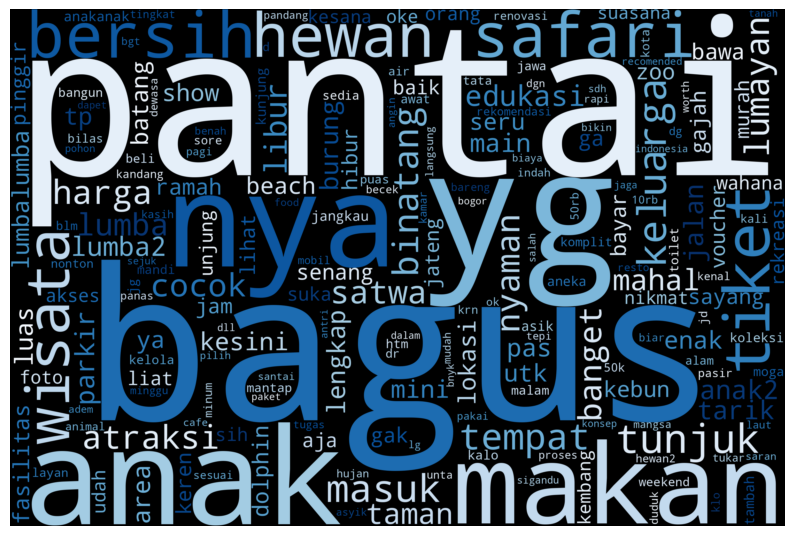

In [51]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk memplot wordcloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))  # Atur ukuran plot
    plt.imshow(wordcloud, interpolation='bilinear')  # Tampilkan wordcloud
    plt.axis('off')  # Hilangkan sumbu

    # Simpan plot ke file
    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')  # Simpan dengan nama file

    plt.show()  # Tampilkan plot

# # Filter data untuk hanya menyertakan tweet positif
# netral_tweets = my_df[my_df['Label'] == 'None']

# # Gabungkan semua kata dalam kolom 'full_text' dari tweet positif menjadi satu string
# netral_words = ' '.join([tweets for tweets in netral_tweets['content']])

# Gabungkan semua kata dalam kolom 'full_text' menjadi satu string
all_words = ' '.join([tweets for tweets in df['text_tokens_stemmed'].fillna('')])

# Buat wordcloud untuk kata-kata positif
wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS  # Hindari kata umum yang ada di STOPWORDS
).generate(all_words)

# Plot wordcloud yang telah dibuat
plot_cloud(wordcloud)

## Wordcloud Klasifikasi Sentimen Positif NB

### 1. Naive Bayes

#### Menghitung Jumlah Baris Positif

In [52]:
df[df['Label NB Average'] == 'positif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,Bagus,bagus,positif,positif,positif,positif,positif
1,"Tempat edukasi bagus, tempat terawat walau masih dalam tahap pengembangan.. Tapi jalan ke area pertunjukan satwa dari pintu masuk teramat jauh, tifak stroller friendly, bahkan bukan jalan yg bagus untuk pejalan kaki apalgi jika bawa anak lbh dari 1.tapi pertunjukan hewan nya bagus, hewan terawat",edukasi bagus awat tahap kembang jalan area tunjuk satwa pintu masuk amat tifak stroller friendly jalan yg bagus pejal kaki apalgi bawa anak lbh 1tapi tunjuk hewan nya bagus hewan awat,positif,positif,positif,positif,positif
2,"Atraksi lumba2nya sudah update. Sudah kesini 3 kali alhamdulillah selalu puas dengan atraksi lumba2nya. Pantainya bersih, enak buat mainan anak2",atraksi lumba2nya update kesini 3 kali alhamdulillah puas atraksi lumba2nya pantai bersih enak main anak2,positif,positif,positif,positif,positif
3,Coba aja pasti menyesal,coba aja sesal,negatif,positif,positif,negatif,positif
4,Cocok untuk berlibur bersama keluarga\nPentas LUMBA - LUMBA\nNaik GAJAH,cocok libur keluargapentas lumba lumbanaik gajah,positif,positif,positif,positif,positif


In [53]:
len(df[df['Label NB Average'] == 'positif'])

1276

#### Penerapan Wordcloud

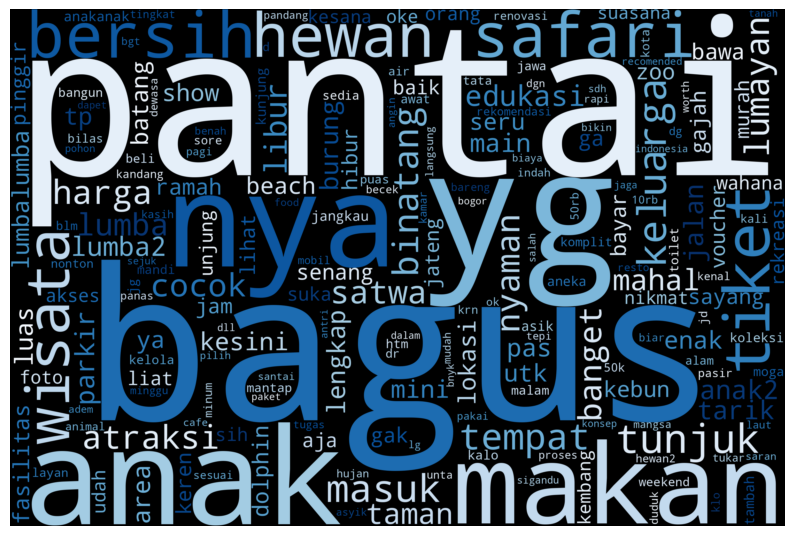

In [54]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')
    plt.show()

netral_tweets = df[df['Label NB Average'] == 'positif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])


wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

### 2. SVM

#### Menghitung Jumlah Baris Positif

In [55]:
df[df['Label SVM Average'] == 'positif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
0,Bagus,bagus,positif,positif,positif,positif,positif
1,"Tempat edukasi bagus, tempat terawat walau masih dalam tahap pengembangan.. Tapi jalan ke area pertunjukan satwa dari pintu masuk teramat jauh, tifak stroller friendly, bahkan bukan jalan yg bagus untuk pejalan kaki apalgi jika bawa anak lbh dari 1.tapi pertunjukan hewan nya bagus, hewan terawat",edukasi bagus awat tahap kembang jalan area tunjuk satwa pintu masuk amat tifak stroller friendly jalan yg bagus pejal kaki apalgi bawa anak lbh 1tapi tunjuk hewan nya bagus hewan awat,positif,positif,positif,positif,positif
2,"Atraksi lumba2nya sudah update. Sudah kesini 3 kali alhamdulillah selalu puas dengan atraksi lumba2nya. Pantainya bersih, enak buat mainan anak2",atraksi lumba2nya update kesini 3 kali alhamdulillah puas atraksi lumba2nya pantai bersih enak main anak2,positif,positif,positif,positif,positif
3,Coba aja pasti menyesal,coba aja sesal,negatif,positif,positif,negatif,positif
4,Cocok untuk berlibur bersama keluarga\nPentas LUMBA - LUMBA\nNaik GAJAH,cocok libur keluargapentas lumba lumbanaik gajah,positif,positif,positif,positif,positif


In [56]:
len(df[df['Label SVM Average'] == 'positif'])

1273

#### Penerapan Wordcloud

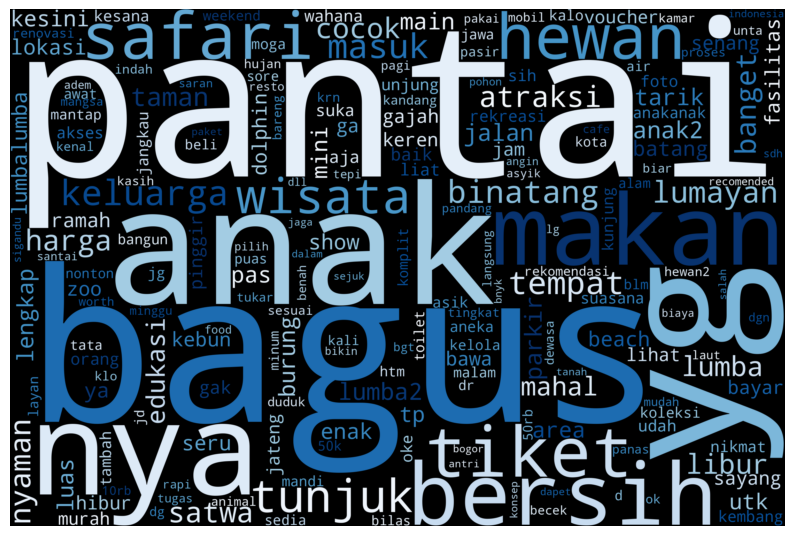

In [57]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')


    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label SVM Average'] == 'positif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

## Wordcloud Klasifikasi Sentimen Negatif

### 1. Naive Bayes

#### Menghitung Jumlah Baris Negatif

In [58]:
df[df['Label NB Average'] == 'negatif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average


In [59]:
len(df[df['Label NB Average'] == 'negatif'])

0

In [60]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label NB Average'] == 'negatif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)

ValueError: We need at least 1 word to plot a word cloud, got 0.

### 2. SVM

#### Menghitung Jumlah Baris Negatif

In [65]:
df[df['Label SVM Average'] == 'negatif'].head()

,content,text_tokens_stemmed,Label,Label NB,Label NB Average,Label SVM,Label SVM Average
220,"Sangat mengecewakan jauh dibawah ekspektasi padahal piknik sekolah tidak ada tour guide hewan hanya sedikit tempat bilas anak terbuka apalagi soal makanan, tidak boleh bawa makanan dari luar tapi harga di dalam tidak masuk akal. Dim sum 3",kecewa bawah ekspektasi piknik sekolah tour guide hewan bilas anak buka makan bawa makan harga masuk akal dim sum 3,negatif,positif,positif,negatif,negatif
276,"Harga makanan mahal rasa gak enak gak ada asin nya ,gak boleh bawa makanan ,jangan kesini mending ke pantai cahaya aja ,pentas lumba2 nya panas bnget harga es teh cup 10rb",harga makan mahal gak enak gak asin nya gak bawa makan kesini mending pantai cahaya aja pentas lumba2 nya panas bnget harga es teh cup 10rb,negatif,positif,positif,negatif,negatif
407,Bisa dicoba sendiri.,coba,negatif,positif,positif,negatif,negatif


In [62]:
len(df[df['Label SVM Average'] == 'negatif'])

3

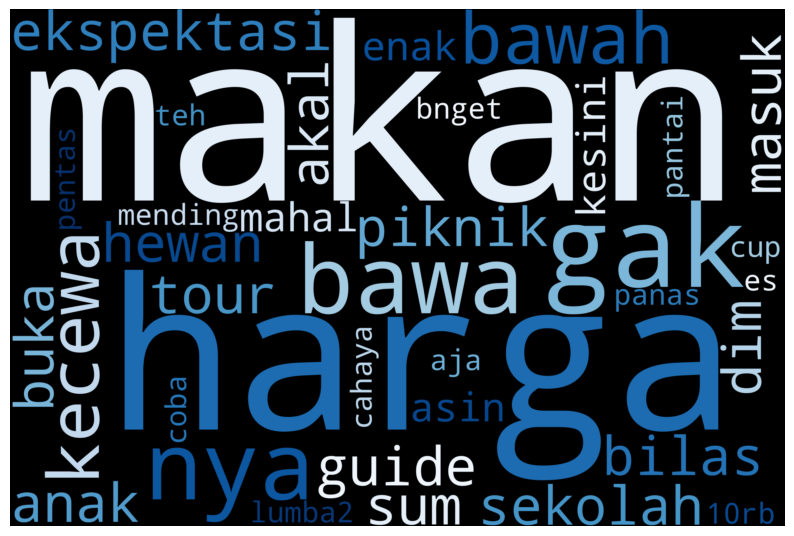

In [63]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

    plt.savefig('wordcloud_output_netral.png', bbox_inches='tight')

    plt.show()

netral_tweets = df[df['Label SVM Average'] == 'negatif'].fillna('')

netral_words = ' '.join([tweets for tweets in netral_tweets['text_tokens_stemmed']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(netral_words)

plot_cloud(wordcloud)